# Lab 8 - Oct 22, 2020

## Getting Setup

1. Clone this repository, open in GitHub Desktop, download the repository (whatever workflow you prefer)
2. Open your terminal/Anaconda Prompt and change directory to where you have this repository
3. Activate the class environment: `conda activate musa509week6`
4. Start up Jupyter Lab: `jupyter lab`
5. Open the `Lab.ipynb` notebook

## Outline

* API review
* Anatomy of an API request
* Explore some APIs
  * MapBox Geocoding API
  * MapBox Directions API
  * MapBox Static Maps API
* Creating re-usable functions

## APIs

**What is an API?**

> An API is an application programming interface. __It is a set of rules that allow programs to talk to each other__. The developer creates the API on the server and allows the client to talk to it.

> REST determines how the API looks like. It stands for “Representational State Transfer”. It is a set of rules that developers follow when they create their API. One of these rules states that you should be able to get a piece of data (called a resource) when you link to a specific URL.

> Each URL is called a **request** while the data sent back to you is called a **response**.
  

## Anatomy of an API request

`https://api.mapbox.com/geocoding/v5/mapbox.places/{address}.json?access_token=abcdefg`

* `http://` -> protocol
* `api.mapbox.com` -> the domain
* `/geocoding/v5/mapbox.places/{address}.json` -> the path
* `?access_token=abcdefg` -> query string


## Import Python `requests`

`requests` is a Python library for performing HTTP requests.

`requests` documentation: <https://requests.readthedocs.io/en/master/>

In [1]:
import json
import requests
from cartoframes.viz import Layer, Map, color_category_style, popup_element
import geopandas as gpd

# Download this file from: https://canvas.upenn.edu/courses/1533813/files/90068242/download?download_frd=1
# place it in the same directory you are running your notebook from
with open("mapbox_token.json") as token_json:
    MAPBOX_TOKEN = json.load(token_json)["token"]

# We'll use this later for interactive maps
basemap = {"style": "mapbox://styles/mapbox/streets-v11", "token": MAPBOX_TOKEN}

## Mapbox (Forward) Geocoding

* Documentation: <https://docs.mapbox.com/api/search/#forward-geocoding>
* Request: `GET /geocoding/v5/mapbox.places/{search_text}.json`
* `search_text` is an address, place name, etc.

**Given an address, what are the lng/lats?**

In [2]:
address = "210 South 34th Street Philadelphia PA, 19104"

geocoding_call = f"https://api.mapbox.com/geocoding/v5/mapbox.places/{address}.json?access_token={MAPBOX_TOKEN}"
resp = requests.get(geocoding_call)
resp.json()

{'type': 'FeatureCollection',
 'query': ['210', 'south', '34th', 'street', 'philadelphia', 'pa', '19104'],
 'features': [{'id': 'address.5785185705753764',
   'type': 'Feature',
   'place_type': ['address'],
   'relevance': 1,
   'properties': {'accuracy': 'rooftop'},
   'text': 'North 34th Street',
   'place_name': '210 North 34th Street, Philadelphia, Pennsylvania 19104, United States',
   'matching_text': 'S 34th St',
   'matching_place_name': '210 S 34th St, Philadelphia, Pennsylvania 19104, United States',
   'center': [-75.191249, 39.959369],
   'geometry': {'type': 'Point', 'coordinates': [-75.191249, 39.959369]},
   'address': '210',
   'context': [{'id': 'neighborhood.290580', 'text': 'Powelton'},
    {'id': 'postcode.4914685313142560', 'text': '19104'},
    {'id': 'place.15631048232712250',
     'wikidata': 'Q1345',
     'text': 'Philadelphia'},
    {'id': 'region.13761801799111630',
     'wikidata': 'Q1400',
     'short_code': 'US-PA',
     'text': 'Pennsylvania'},
    {'id'

Notice all of the information returned here

In [3]:
resp.json()["features"][0]

{'id': 'address.5785185705753764',
 'type': 'Feature',
 'place_type': ['address'],
 'relevance': 1,
 'properties': {'accuracy': 'rooftop'},
 'text': 'North 34th Street',
 'place_name': '210 North 34th Street, Philadelphia, Pennsylvania 19104, United States',
 'matching_text': 'S 34th St',
 'matching_place_name': '210 S 34th St, Philadelphia, Pennsylvania 19104, United States',
 'center': [-75.191249, 39.959369],
 'geometry': {'type': 'Point', 'coordinates': [-75.191249, 39.959369]},
 'address': '210',
 'context': [{'id': 'neighborhood.290580', 'text': 'Powelton'},
  {'id': 'postcode.4914685313142560', 'text': '19104'},
  {'id': 'place.15631048232712250',
   'wikidata': 'Q1345',
   'text': 'Philadelphia'},
  {'id': 'region.13761801799111630',
   'wikidata': 'Q1400',
   'short_code': 'US-PA',
   'text': 'Pennsylvania'},
  {'id': 'country.19678805456372290',
   'wikidata': 'Q30',
   'short_code': 'us',
   'text': 'United States'}]}

### Let's turn this into a dataframe for easier viewing

`resp.json()` is a GeoJSON object, so we can create a GeoDataFrame from it.

In [4]:
geocoding_results = gpd.GeoDataFrame.from_features(resp.json())
geocoding_results

,geometry,accuracy
0,POINT (-75.19125 39.95937),rooftop
1,POINT (-75.19876 39.93861),street
2,POINT (-75.20096 39.93099),street
3,POINT (-75.52584 40.58316),interpolated
4,POINT (-75.18506 40.00294),street


In [5]:
Map(Layer(geocoding_results, color_category_style("accuracy")), basemap=basemap)

## How would you turn the geocoding code above into a function?

What would be the inputs/outputs?

```python
def function_name(arg1, arg2):
    ... some code happens here ...
    return result
```

In [ ]:
# write a function for geocoding here
address = "210 South 34th Street Philadelphia PA, 19104"

def geocode(address):
    geocoding_call = f"https://api.mapbox.com/geocoding/v5/mapbox.places/{address}.json?access_token={MAPBOX_TOKEN}"
    resp = requests.get(geocoding_call)
    return resp.json()

def geocode_to_dataframe(json):
geocoding_results = gpd.GeoDataFrame.from_features(resp.json())
geocoding_results

In [ ]:
geocode_json = geocode("301 W 105h St New York")

## (Forward) Geocoding with Place Names

Mapbox Geocoding API will return lng/lats if you give it place names.

In [6]:
place_name = "Meyerson Hall, University of Pennsylvania"

geocoding_call = f"https://api.mapbox.com/geocoding/v5/mapbox.places/{place_name}.json?access_token={MAPBOX_TOKEN}"
resp = requests.get(geocoding_call)
resp.json()

{'type': 'FeatureCollection',
 'query': ['meyerson', 'hall', 'university', 'of', 'pennsylvania'],
 'features': [{'id': 'poi.549755862745',
   'type': 'Feature',
   'place_type': ['poi'],
   'relevance': 0.637037,
   'properties': {'foursquare': '4b184470f964a520e7cf23e3',
    'landmark': True,
    'wikidata': 'Q6826494',
    'address': '210 S 34th St',
    'category': 'college, university, building'},
   'text': 'Meyerson Hall',
   'place_name': 'Meyerson Hall, 210 S 34th St, Philadelphia, Pennsylvania 19104, United States',
   'center': [-75.19269399999999, 39.952242],
   'geometry': {'coordinates': [-75.19269399999999, 39.952242],
    'type': 'Point'},
   'context': [{'id': 'neighborhood.2101819', 'text': 'University City'},
    {'id': 'postcode.4914685313142560', 'text': '19104'},
    {'id': 'place.15631048232712250',
     'wikidata': 'Q1345',
     'text': 'Philadelphia'},
    {'id': 'region.13761801799111630',
     'wikidata': 'Q1400',
     'short_code': 'US-PA',
     'text': 'Penn

In [7]:
places = gpd.GeoDataFrame.from_features(resp.json())
places

,geometry,foursquare,landmark,wikidata,address,category,maki
0,POINT (-75.19269 39.95224),4b184470f964a520e7cf23e3,True,Q6826494,210 S 34th St,"college, university, building",NaN
1,POINT (-75.15520 39.98080),415c9e00f964a520511d1fe3,True,Q1420239,1801 N Broad St,"college, university",college
2,POINT (-75.18896 39.95588),49c14412f964a5209b551fe3,True,Q603034,3141 Chestnut St,"college, university",college
3,POINT (-75.18690 39.95411),4abe6b6af964a520758d20e3,True,NaN,3141 Chestnut St,"college, university",college
4,POINT (-75.10911 40.11714),4b546113f964a52037b927e3,True,Q7163224,1600 Woodland Rd,"college, university",college


In [8]:
Map(Layer(places), basemap=basemap)

## Mapbox Reverse Geocoding

Reverse Geocoding is turning a lng/lat pair into an address or location description.

Given `(-73.989,40.733)` what is at that location?

In [9]:
# Retrieve places near a specific location

# let's use the HTTP query parameters as a dictionary
geocode_params = {"access_token": MAPBOX_TOKEN}
lng = -73.989
lat = 40.733

resp = requests.get(
    f"https://api.mapbox.com/geocoding/v5/mapbox.places/{lng},{lat}.json",
    params=geocode_params,
)
resp.json()

{'type': 'FeatureCollection',
 'query': [-73.989, 40.733],
 'features': [{'id': 'address.8304124302640056',
   'type': 'Feature',
   'place_type': ['address'],
   'relevance': 1,
   'properties': {'accuracy': 'rooftop'},
   'text': 'East 13th Street',
   'place_name': '120 East 13th Street, New York, New York 10003, United States',
   'center': [-73.9888929, 40.7330031],
   'geometry': {'type': 'Point', 'coordinates': [-73.9888929, 40.7330031]},
   'address': '120',
   'context': [{'id': 'neighborhood.2103290', 'text': 'Greenwich Village'},
    {'id': 'postcode.13482670360296810', 'text': '10003'},
    {'id': 'locality.12696928000137850',
     'wikidata': 'Q11299',
     'text': 'Manhattan'},
    {'id': 'place.15278078705964500', 'wikidata': 'Q60', 'text': 'New York'},
    {'id': 'region.17349986251855570',
     'wikidata': 'Q1384',
     'short_code': 'US-NY',
     'text': 'New York'},
    {'id': 'country.19678805456372290',
     'wikidata': 'Q30',
     'short_code': 'us',
     'text': 

## Let's visualize the results of this API response

There are three things I see to visualize:

1. The original lng/lat point
2. The point places returned
3. The bounding boxes of the places

Let's put them all on a map together

#### 1. Original lng/lat

In [10]:
original_point = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(
        [lng],
        [lat],
    )
)

#### 2. Reverse geocoding points

In [11]:
rev_geocoding = gpd.GeoDataFrame.from_features(resp.json())
rev_geocoding["place_name"] = [row["place_name"] for row in resp.json()["features"]]
rev_geocoding["place_text"] = [row["text"] for row in resp.json()["features"]]
rev_geocoding

,geometry,accuracy,wikidata,short_code,place_name,place_text
0,POINT (-73.98889 40.73300),rooftop,NaN,NaN,"120 East 13th Street, New York, New York 10003...",East 13th Street
1,POINT (-74.00290 40.72840),NaN,NaN,NaN,"Greenwich Village, Manhattan, New York, New Yo...",Greenwich Village
2,POINT (-73.99000 40.73000),NaN,NaN,NaN,"New York, New York 10003, United States",10003
3,POINT (-73.95970 40.79030),NaN,Q11299,NaN,"Manhattan, New York, New York, United States",Manhattan
4,POINT (-73.98080 40.76480),NaN,Q60,NaN,"New York, New York, United States",New York
5,POINT (-75.46525 42.75121),NaN,Q1384,US-NY,"New York, United States",New York
6,POINT (-97.92221 39.38127),NaN,Q30,us,United States,United States


#### 3. Bounding Boxes

In [12]:
from shapely.geometry import box

bboxes = [
    box(*row.get("bbox", [lng, lat, lng, lat])) for row in resp.json()["features"]
]
bboxes = gpd.GeoDataFrame(geometry=bboxes)
bboxes["place_text"] = [row["text"] for row in resp.json()["features"]]

#### Map

In [13]:
Map(
    [
        Layer(
            bboxes,
            "color: transparent strokeWidth: 2 strokeColor: #FF00FF",
            popup_hover=popup_element("place_text"),
        ),
        Layer(
            rev_geocoding,
            "width: 10 color: transparent strokeWidth: 2 strokeColor: cyan",
        ),
        Layer(original_point, "color: yellow"),
    ],
    basemap=basemap,
)

### How would you return the reverse geocoding code into a function?

1. What are the intputs?
2. What would you want to return?

In [ ]:
# write your reverse geocoding function here
geocode_params = {"access_token": MAPBOX_TOKEN}
lng = -73.989
lat = 40.733

resp = requests.get(
    f"https://api.mapbox.com/geocoding/v5/mapbox.places/{lng},{lat}.json",
    params=geocode_params,
)
resp.json()

def reverse_geocoding (lng, lat):
    resp = requests.get(
    f"https://api.mapbox.com/geocoding/v5/mapbox.places/{lng},{lat}.json",
    params=geocode_params,
    )
    retuen resp.json()

### Directions API

* Documentation: <https://docs.mapbox.com/api/navigation/#directions>
* Playground: <https://docs.mapbox.com/playground/directions/>

In [14]:
directions_params = {
    "alternatives": "true",
    "geometries": "geojson",
    "steps": "false",
    "access_token": MAPBOX_TOKEN,
}

start_lng = -73.96960354605999
start_lat = 40.8012032714376

end_lng = -73.93668699879295
end_lat = 40.70429504558561


directions_resp = requests.get(
    f"https://api.mapbox.com/directions/v5/mapbox/cycling/{start_lng},{start_lat};{end_lng},{end_lat}",
    params=directions_params,
)
directions_resp.json()

{'routes': [{'geometry': {'coordinates': [[-73.969613, 40.801192],
     [-73.963853, 40.797925],
     [-74.004554, 40.742125],
     [-74.005676, 40.737018],
     [-74.002106, 40.729622],
     [-73.99228, 40.725262],
     [-73.993153, 40.722831],
     [-73.985316, 40.720494],
     [-73.986626, 40.71795],
     [-73.950549, 40.708106],
     [-73.941759, 40.708944],
     [-73.94103, 40.704637],
     [-73.939368, 40.704787],
     [-73.937648, 40.703372],
     [-73.934791, 40.703935],
     [-73.936689, 40.704302]],
    'type': 'LineString'},
   'legs': [{'summary': '',
     'weight': 4494,
     'duration': 4441.1,
     'steps': [],
     'distance': 16908.4}],
   'weight_name': 'cyclability',
   'weight': 4494,
   'duration': 4441.1,
   'distance': 16908.4},
  {'geometry': {'coordinates': [[-73.969613, 40.801192],
     [-73.963853, 40.797925],
     [-73.965626, 40.795486],
     [-73.961458, 40.793393],
     [-73.964354, 40.789082],
     [-73.967107, 40.787479],
     [-73.967225, 40.784486],
 

In [15]:
from cartoframes.viz import color_category_style
from shapely.geometry import shape

route = gpd.GeoDataFrame(
    {
        "route_option": [
            str(idx) for idx in range(len(directions_resp.json()["routes"]))
        ]
    },
    geometry=[
        shape(directions_resp.json()["routes"][idx]["geometry"])
        for idx in range(len(directions_resp.json()["routes"]))
    ],
)

Map(Layer(route, color_category_style("route_option")), basemap=basemap)

### How would you turn Directions API into a re-usable function?

### Mapbox Static Images API

* Documentation: <https://docs.mapbox.com/api/maps/#static-images>.
* Sandbox tool: <https://docs.mapbox.com/playground/static/>

In [18]:
static_params = {"access_token": MAPBOX_TOKEN}

static_map_resp = requests.get(
    f"https://api.mapbox.com/styles/v1/mapbox/streets-v11/static/{start_lng},{start_lat},10.95,0/800x800",
    params=static_params,
)

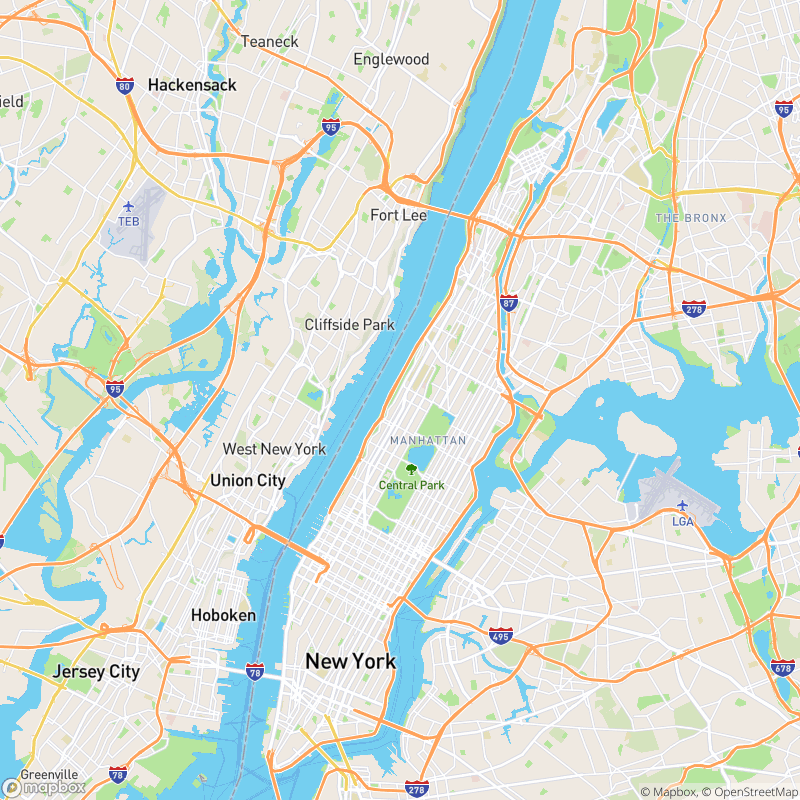

In [19]:
from IPython import display

display.Image(static_map_resp.content)

### Displaying a route on a map

Using the overlay options, we can display a route from the directions API on the map.

First we need to turn the route into a GeoJSON string.
Next, we need to insert it into the API request

`GET /styles/v1/mapbox/streets-v11/static/geojson({geojson_string})/{lng},{lat},{zoom}/{width}x{height}`

In [20]:
route.iloc[:1]

,route_option,geometry
0,0,"LINESTRING (-73.96961 40.80119, -73.96385 40.7..."


In [21]:
geojson_str = route.iloc[:1].to_json()
geojson_str

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"route_option": "0"}, "geometry": {"type": "LineString", "coordinates": [[-73.969613, 40.801192], [-73.963853, 40.797925], [-74.004554, 40.742125], [-74.005676, 40.737018], [-74.002106, 40.729622], [-73.99228, 40.725262], [-73.993153, 40.722831], [-73.985316, 40.720494], [-73.986626, 40.71795], [-73.950549, 40.708106], [-73.941759, 40.708944], [-73.94103, 40.704637], [-73.939368, 40.704787], [-73.937648, 40.703372], [-73.934791, 40.703935], [-73.936689, 40.704302]]}}]}'

In [22]:
static_params = {"access_token": MAPBOX_TOKEN}

static_map_resp = requests.get(
    f"https://api.mapbox.com/styles/v1/mapbox/streets-v11/static/geojson({geojson_str})/{start_lng},{start_lat},10.95,0/800x800",
    params=static_params,
)

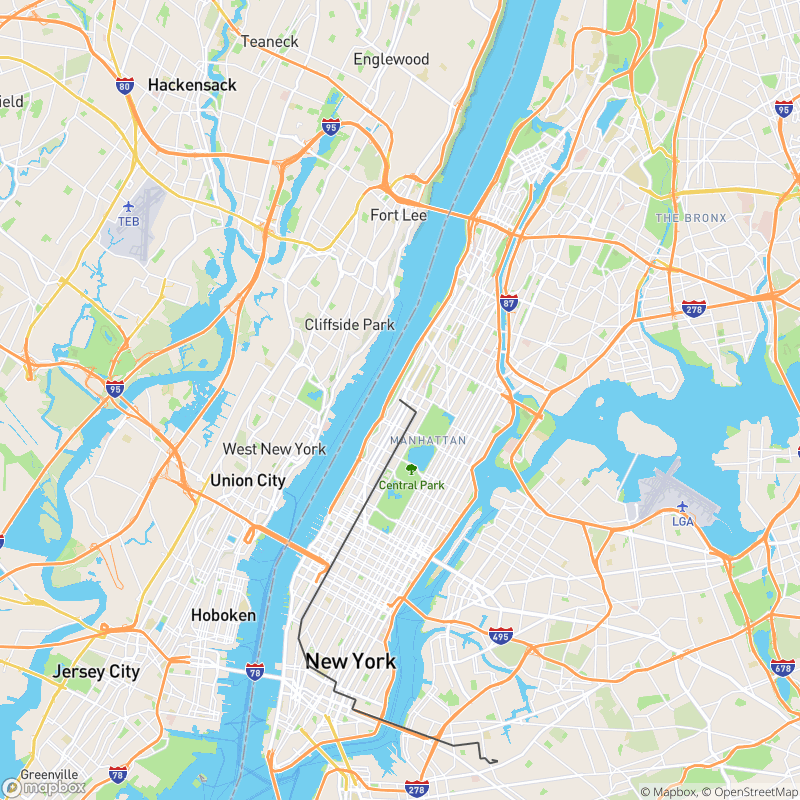

In [23]:
from IPython import display

display.Image(static_map_resp.content)